# CS483 - Colab 1
## Word Count in Spark

This code is written by Parikha Goyanka
Sources: mainly normal Google search, GFG, W3School

### Setup

Let's set up Spark on your Colab environment.  Run the cell below!

In [ ]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=375e79034539ef258a7a3e0c47f39b8f35c9858cfafd4301a0b5305ea246a362
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark
The following additional packages will be installed:
  libxtst6 openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra fonts-nanum fonts-ipafont-gothic
  fonts-ipafont-mincho fonts-wqy-microhei fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  libxtst6 openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 39.6 MB of archives.
After this operation, 144 MB of additional disk space will be used.
Selecting previously unselected package

Now we authenticate a Google Drive client to download the file we will be processing in our Spark job.

**Make sure to follow the interactive instructions.**

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
id='1SE6k_0YukzGd5wK-E4i6mG83nydlfvSa'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('pg100.txt')

If you executed the cells above, you should be able to see the file *pg100.txt* under the "Files" tab on the left panel.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Your task

If you successfully run the setup stage, you are ready to work on the *pg100.txt* file which contains a copy of the complete works of Shakespeare.

Write a Spark application which outputs the number of words that start with each letter. This means that for every letter, we want to count the total number of (non-unique) words that start with a specific letter.

In your implementation, **ignore the letter case**, i.e., consider all words as lower case. Also, you can ignore all words that **start** with a non-alphabetic character. You should output word counts for the **entire document**, inclusive of the title, author, and the main texts. If you encounter words broken as a result of new lines, e.g. "pro-ject" where the segment after the dash sign is on a new line, no special processing is needed and you can safely consider it as two words.

Your outputs will be graded on a range -- if your differences from the ground-truths are within an error threshold of 5, you'll be considered correct.

In [ ]:
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark import SparkContext
import pandas as pd

# create the Spark Session
spark = SparkSession.builder.getOrCreate()

# create the Spark Context
sc = spark.sparkContext

In [ ]:
# YOUR
#txt = spark.read.text("")
txt = sc.textFile('pg100.txt')
txt.take(5)

['The Project Gutenberg EBook of The Complete Works of William Shakespeare, by',
 'William Shakespeare',
 '',
 'This eBook is for the use of anyone anywhere at no cost and with',
 'almost no restrictions whatsoever.  You may copy it, give it away or']

In [ ]:
# CODE
Trial = txt.map(lambda var: var.lower()).flatMap(lambda var: var.split(" "))
Trial.take(5)

['the', 'project', 'gutenberg', 'ebook', 'of']

In [ ]:
# HERE
import string
letter = list(string.ascii_lowercase)
alpha_count = pd.DataFrame(letter, columns= ["Letter"])
print(alpha_count)

   Letter
0       a
1       b
2       c
3       d
4       e
5       f
6       g
7       h
8       i
9       j
10      k
11      l
12      m
13      n
14      o
15      p
16      q
17      r
18      s
19      t
20      u
21      v
22      w
23      x
24      y
25      z


In [ ]:
def letter_word_count(char):
  counting= Trial.filter(lambda x: x[0] in {char} if x else False).count()
  return counting

In [ ]:
alpha_count['occurance']= alpha_count['Letter'].apply(letter_word_count)
alpha_count

,Letter,occurance
0,a,84836
1,b,45455
2,c,34567
3,d,29713
4,e,18697
5,f,36814
6,g,20782
7,h,60563
8,i,62167
9,j,3339


from matplotlib import pyplot as plt
alpha_count['occurance'].plot(kind='hist', bins=20, title='occurance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
alpha_count['occurance'].plot(kind='line', figsize=(8, 4), title='occurance')
plt.gca().spines[['top', 'right']].set_visible(False)

Text(0, 0.5, 'Count')

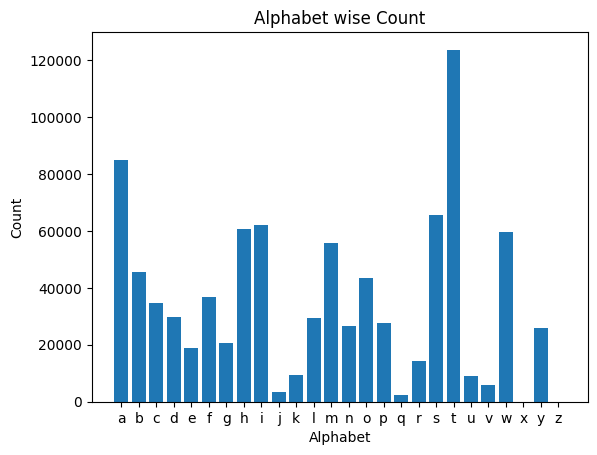

In [ ]:
from matplotlib import pyplot as plt
plt.bar(alpha_count['Letter'],alpha_count['occurance'])
plt.title("Alphabet wise Count")
plt.xlabel("Alphabet")
plt.ylabel("Count")


Once you obtained the desired results, **head over to Gradescope and submit your solution for this Colab**!